<a href="https://colab.research.google.com/github/LGLV/APS-Failure-at-Scania-Trucks-Data-Set/blob/main/6_1_An%C3%A1lisis_exploratorio_de_datos_versi%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis exploratorio de bases de datos**


---


# Objetivos
---
* Introducir a la visualización y al análisis de datos químicos.
* Utilizar métodos visuales como histogramas, diagramas de caja y de violín para analizar propiedades fisicoquimicas de importancia farmacéutica y descriptores asociados con complejidad molecular.
* Identificar posibles correlaciones entre variables.

Los ejercios elaborados en este tutorial están enfocados en analizar y mostrar de una manera gráfica, por medio de representaciones visuales, propiedades fisicoquimicas y descriptores de importancia farmacéutica.
___

Para los siguientes ejercicios usaremos una base de datos descargada de [ChEMBL](https://www.ebi.ac.uk/chembl/) que contiene información sobre fármacos en fase 4 (aprobados y comercializados) con 1677 moléculas. La base de datos tiene columnas que nos informan el identificador (ID) de cada compuesto en ChEMBL, nombre, SMILES, tipo de molécula, fase clínica, si es de administración oral, parenteral o tópica, el año en que fue aprobado como fármaco y su indicación terapéutica.

Los descriptores que se calcularán son los siguientes :


>  1 - Coeficiente de partición (logP) <br>
   2 - Área de superficie polar topológica (TPSA) <br>
   3 - Masa molar (MW) <br>
   4 - Número de enlaces rotables (RotBonds) <br>
   5 - Número de donadores de puente de hidrógeno (HBD) <br>
   6 - Número de aceptores de puente de hidrógeno (HBA)<br>
   7 - Número de heteroátomos (HetAtoms)<br>
   8 - Número de anillos (NumRings)<br>
   9 - Fracción de átomos de carbono sp<sup>3</sup> (CSP3)  <br>


  En la primera parte de este tutorial, se graficarán diferentes tipos de representaciones visuales para obtener información visual sobre nuestras variables (en este caso, descriptores de importancia farmacéutica). Además, se analizarán las posibles correlaciones entre los distintos descriptores moleculares.


#Preparación del entorno
___

Instalación de librerías necesarias:

In [ ]:
!pip install rdkit #Quimioinformática
!pip install pandas==1.5.3

Importamos las librerías y módulos necesarios:

In [ ]:
#Manipulación de datos y gráficas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Quimioinformática
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True) #Para visualizar moléculas

Accedemos a la base de datos:

Abriremos un archivo .xlsx con la librería `pandas` y trabajaremos con el  *dataframe* nombrado "df":

In [ ]:
#Cargar archivo desde nuestra computadora:
df=pd.read_excel("https://github.com/DIFACQUIM/Cursos/raw/refs/heads/main/Datasets/chembl_fases_curada.xlsx", engine='openpyxl')

print(f"DataFrame shape: {df.shape}.")
df

In [ ]:
#Información sobre el DataFrame:
df.info()

In [ ]:
#Estadística básica sobre los datos:
df.describe()

# Gráficos de una variable
---

## Cálculo de descriptores

Calcularemos distintas propiedades fisicoquímicas con `RDKit`:

In [ ]:
#Nueva columna de objeto tipo Mol
PandasTools.AddMoleculeColumnToFrame(df, "canonical_smiles")
df[0:2]

In [ ]:
#Cálculo de la masa molar exacta
df["MW"] = df["ROMol"].apply(Descriptors.ExactMolWt)
df[0:2]

In [ ]:
#Cálculo del resto de los descriptores a analizar
df["HBA"] = df["ROMol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["ROMol"].apply(Descriptors.NumHDonors)
df["logP"] = df["ROMol"].apply(Descriptors.MolLogP)
df["TPSA"] = df["ROMol"].apply(Descriptors.TPSA)
df["CSP3"] = df["ROMol"].apply(Descriptors.FractionCSP3)
df["NumRings"] = df["ROMol"].apply(Descriptors.RingCount)
df["HetAtoms"] = df["ROMol"].apply(Descriptors.NumHeteroatoms)
df["RotBonds"] = df["ROMol"].apply(Descriptors.NumRotatableBonds)
#Visualizar columnas seleccionadas
df[['MW', 'logP', 'TPSA', 'HBA']]

Más información sobre los descriptores que pueden calcularse con `RDKit`: <br>
https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html <br>
https://rdkit.org/docs/source/rdkit.Chem.Lipinski.html

##Histogramas

Un histograma es una representación gráfica en forma de barras, que simboliza la distribución de un conjunto de datos por intervalos y la frecuencia de estos intervalos en un rango.
Haciendo uso del método .hist de Matplotlib, se observa el histograma del número de enlaces rotables de los fármacos de administración parenteral.

In [ ]:
#Guardar un nuevo dataframe sólo con los fármacos parenterales
df_parenteral = df[df['parenteral']== 1]
#Graficar el histograma con Seaborn
hist=sns.histplot(x="RotBonds", data = df_parenteral)
#Título, títulos de ejes, y tamaño de letra
hist.axes.set_title("Enlaces rotables",fontsize=18)
hist.set_xlabel("RotBonds",fontsize=14)
hist.set_ylabel("Count",fontsize=14)
hist.tick_params(labelsize=14)

También es posible analizar todas las variables en un mismo gráfico. En este caso se muestra la distribución de los valores para los diferentes descriptores de la base de compuestos de administración parenteral.

In [ ]:
#Seleccionar los descriptores a graficar
df_parenteral_descriptors= df_parenteral[['MW', 'HBA', 'HBD', 'logP', 'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds']]
#Histograma
df_parenteral_descriptors.hist(figsize=(12,12), color="slateblue")
plt.show()

##Gráficos de caja

Un *boxplot* o gráfico de caja, es un grafico unidimensional sencillo que muestra todos los valores de una variable de la base de datos.
Los *boxplot* nos muestran la distribución de los datos, con ayuda de la caja y de la mediana es posible observar si esta es simétrica, sesgada a la derecha o a la izquierda. También nos permite identificar valores atípicos u *outliers* y poder comparar distribuciones (ver **Figura 1**).




**Figura 1.** Diferentes elementos que componen un *boxplot*
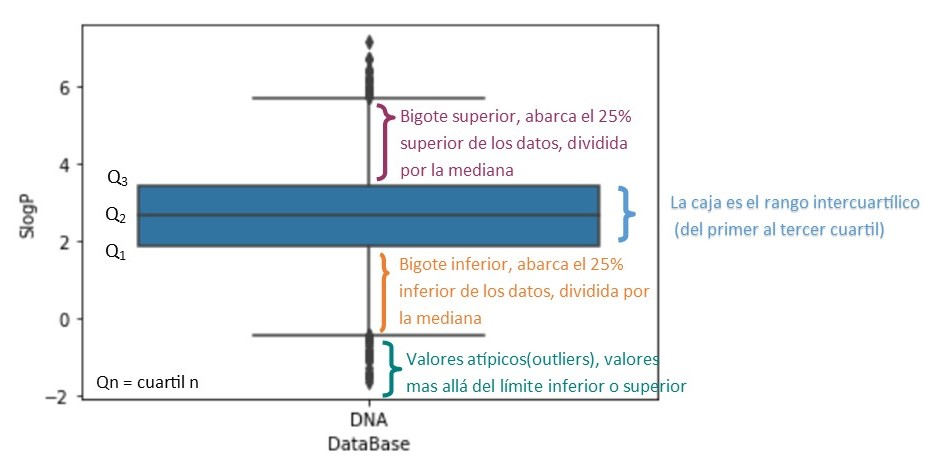

Se puede generar la representacion grafica de un *boxplot* a partir de la paquetería `Seaborn`, que ya fue instalada previamente.

Para graficar los datos de acuerdo con su vía de administración se creará una nueva columna nombrada como "Via_admon":

In [ ]:
#Condiciones para asignar la vía de administración a cada compuesto
conditions = [
    (df['oral'] == 1),
    (df['parenteral'] == 1),
    (df['topical'] == 1),
    (df['oral'] == 0) & (df['parenteral'] == 0) & (df['topical'] == 0)]
#Nombre que se asignará al compuesto de acuerdo con su vía de administración
values = ['Oral', 'Parenteral', 'Topical', 'Other']
#Crear nueva columna y visualizar dataframe
df['Via_admon'] = np.select(conditions, values)
df[53:59]

In [ ]:
#Graficar boxplot de la masa molar de cada vía de administración
ax = sns.boxplot(x="Via_admon", y="MW", data=df, palette="GnBu")
#Título de ejes
plt.xlabel('Vía de administración', size=14)
plt.ylabel('Masa molar', size=14)

In [ ]:
#Graficar boxplot sin outliers
ax = sns.boxplot(x="Via_admon", y="MW", data=df, palette="GnBu", showfliers=False)
plt.xlabel('Vía de administración', size=14)
plt.ylabel('Masa molar', size=14)

Más paletas de colores para `seaborn`: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f

Veamos *boxplots* conjuntos para todas las variables:

In [ ]:
#Seleccionamos sólo las columnas de descriptores de los fármacos de administración oral
df_oral = df[df['oral']== 1]
df_oral_descriptors= df_oral[['MW', 'HBA', 'HBD', 'logP', 'TPSA', 'CSP3', 'NumRings', 'HetAtoms', 'RotBonds']]
#Graficamos boxplots para todas las variables:
ax = sns.boxplot(data=df_oral_descriptors, orient="h", palette="rainbow")
#Especificamos tamaño de la figura con Matplotlib:
plt.gcf().set_size_inches(10, 5)
plt.show()

Como podemos ver, los valores de las variabes están en escalas diferentes. Para visualizarlo mejor, apliquemos escala logarítmica:


In [ ]:
#Vuelvo a graficar los boxplots:
ax = sns.boxplot(data=df_oral_descriptors, orient="h", palette="rainbow")
#Eje x en escala logarítmica:
ax.set_xscale('symlog')
#Especifico desde dónde hasta dónde quiero que me grafique el eje x:
ax.axis(xmin=-25, xmax=1500)
#Tamaño de la figura:
plt.gcf().set_size_inches(10, 5)

Como podemos ver, las medias de los datos varían mucho. Esto ocurre porque los datos están en diferentes escalas, lo que significa que se utilizan diferentes unidades para medir las diferentes características. Para  **normalizar o escalar los datos**, existen varios procedimientos descritos (ver en [*Scaling of Data*](http://www.statistics4u.com/fundstat_eng/cc_scaling.html)). Un método común es estandarizar las variables restando la media de la columna y dividiéndola por la varianza, haciendo esto nos quedan nuevos valores dentro de cada columna para los cuales $\mu=0$ y $\sigma=1$ . `Scikit-learn` tiene un módulo para esto llamado "preprocessing", que usaremos a continuación. Para más información sobre esto, revisar la [documentación de Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 'Standard Scaler')


Para el proceso de normalización, es necesario eliminar las columnas de tipo *string*.

In [ ]:
#Verificar que las variables sean numéricas
df_oral_descriptors.info()

**Paquetería y funciones a instalar**

`Standard scaler`: Elimina la media y escala cada caracteristica/variable a la varianza de la unidad, se realiza por caracteristicas de forma independiente.
Para saber más: [*Standar scaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [ ]:
#Importo la función StandardScaler de la librería ScikitLearn
from sklearn.preprocessing import StandardScaler

#Hago un nuevo objeto con los datos normalizados:
scaled = StandardScaler().fit_transform(df_oral_descriptors)  #El método fit.transform() ajusta estos nuevos valores a los datos y los almacena,
                                                              #reemplazando los valores anteriores.

#Hago un nuevo dataframe normalizado, lo llamo "df_scaled":
df_scaled = pd.DataFrame(data=scaled, columns=df_oral_descriptors.columns)

#Grafico boxplots de las variables de ese nuevo dataframe (con Seaborn):
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

#Tamaño de  la figura del gráfico de Seaborn (con Matplotlib)
plt.gcf().set_size_inches(15, 5)

Documentación de *boxplots* con `seaborn`: https://seaborn.pydata.org/generated/seaborn.boxplot.html

##Diagramas de violín
Los *violin plots* pueden usarse para visualizar la información contenida en un *boxplot*, es decir, la media, los cuartiles, y los valores máximo y mínimo, agregando además la información de la distribución de los datos (**Figura 2**).

**Figura 2.** Diferentes elementos que componen un *violinplot* <br>
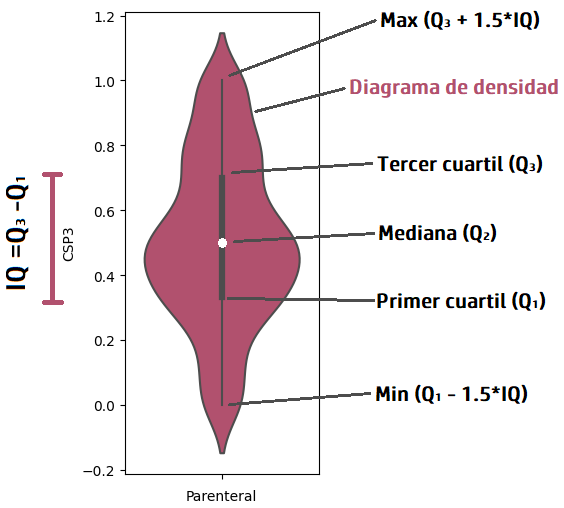

In [ ]:
#Graficar violinplot con el área de superficie polar topológica de los fármacos orales
sns.violinplot(y="TPSA", data=df_oral_descriptors, palette="BuPu")
#Agregar puntos para cada dato
sns.stripplot(y="TPSA", data=df_oral_descriptors, color='midnightblue', alpha=0.5)

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Via_admon", y="CSP3", data=df, palette="flare")

También podemos utilizar los gráficos de violín para comparar dos descriptores entre sí y visualizar una posible correlación entre ambos. Por ejemplo, al graficar el número de anillos vs. la masa molar exacta podemos observar que cuando uno aumenta el otro también (directamente proporcionales):

In [ ]:
#Violinplot del número de anillos vs. masa molar de los fármacos orales
ax = sns.violinplot(x = 'NumRings', y = 'MW', data = df_oral_descriptors, palette="rainbow")
#Establecer límites para ambos ejes
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 1600)
#Tamaño de gráfico
plt.gcf().set_size_inches(10, 5)

Documentación de *violinplots* con `seaborn`: https://seaborn.pydata.org/generated/seaborn.violinplot.html

#Análisis de Correlación
---

Otro aspecto importante para entender nuestros datos es estudiar la correlación entre las variables. Si queremos, por ejemplo, observar la correlación entre logP y TPSA, podemos hacer este gráfico de dispersión con histogramas marginales usando "`sns.jointplot`"


In [ ]:
joint_plt = sns.jointplot(x='logP', y='TPSA', data=df, kind='reg')


Se observa una pendiente no muy pronunciada, se infiere que la relación no es exactamente lineal y se tenga una correlación baja.

##Pair Plot

Otra forma de visualizar la correlación entre las variables
es trazar una matriz de correlación con la función `pairplot` de Seaborn. Por ejemplo, acá trazamos la correlación de seis de las columnas del dataset: "logP", "TPSA", "MW", "RotBonds", "HBD" y "HBA".


In [ ]:
sns.pairplot(df[["logP", "TPSA", "MW", "RotBonds", "HBD", "HBA"]], corner="true")
#corner=True omite la representación de la mitad superior de la matriz

##Coeficiente de Correlación de Pearson
 Podemos calcular la correlación entre dos variables con el coeficiente de correlación _Pearson_ y el _valor p_.

El _coeficiente de correlación de Pearson_ (r) nos permite observar fácilmente las dependencias lineales entre dos conjuntos de datos.
* Un valor de +1 significa correlación lineal positiva total,
* 0 significa que no hay correlación lineal, y
* -1, correlación lineal negativa total.

Las correlaciones positivas implican que a medida que *x* aumenta, también lo hace *y*. Las correlaciones negativas implican que a medida que *x* aumenta, *y* disminuye.

El _valor p_ indica aproximadamente la probabilidad de que los conjuntos de datos no correlacionados tengan un coeficiente de correlación _Pearson_ al menos tan extremo como el determinado para esos conjuntos de datos. Si esta probabilidad es inferior al 5% (P<0,05), significa que el coeficiente de correlación es estadísticamente significativo.

**Hay que tener cuidado porque la correlación no implica causalidad. Cuando dos variables están correlacionadas, puede haber o no una conexión causal, y esta conexión puede ser además indirecta.**



In [ ]:
#Importar la  función PearsonR del módulo "stats" de la librería SciPy
from scipy.stats import pearsonr
#Definir una función para obtener la correlación entre dos variables
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("La correlación entre {} y {} es {:.2f}".format(col1, col2, pearson_corr))
    print("El valor-P de esta correlación es {:.^e}".format(p_value))
#Usamos la función para obtener la correlación entre logP y TPSA
get_corr('logP', 'TPSA', df)

Hay una correlación negativa entre logP y TPSA ( r = -0.21 ), siendo esta significativa al obtener un valor de p inferior al 5%.
También significa que a medida que *x* aumenta, *y* disminuye. Sin embargo, la correlación no es alta al no acercarse a -1.

##Mapa de calor (*heat map*)

Los  mapas de calor o *heat maps* son representaciones gráficas que nos permiten observar la correlación entre variables (descriptores) evitando así ruido e información redundante.


Podemos crear un DataFrame con el coeficiente de correlación de Pearson para cada par de columnas (usando la función `df.corr()`) y luego, usar `Matplotlib` y `Seaborn` para crear un _heatmap_ de los coeficientes.


In [ ]:
# Calculamos la correlación con el coeficiente de Pearson usando Pandas:
correlation = df_oral_descriptors.corr(method='pearson')
# Creamos una nueva figura con Matplotlib y definimos el tamaño:
fig=plt.gcf()
fig.set_size_inches(9,9)
# Heatmap de correlación usando Seaborn:
sns.heatmap(correlation, annot=False,square=True)

 Cuando se comparan varias variables al mismo tiempo es difícil comprender cómo se comportan los datos. Así que podríamos añadir al *heatmap* los coeficientes de cada comparación y trazar sólo la matriz de correlación triangular inferior (ya que es un gráfico simétrico, y la información del triángulo superior es redundante).


In [ ]:
#Calcular correlación
correlation = df_oral_descriptors.corr()
# np.triu es una función de Numpy que proporciona el triángulo superior de una matriz cuadrada
upper_triangle = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=upper_triangle,square=True,annot=True)

#Análisis de núcleos base o *scaffolds*

En esta sección visualizaremos los *scaffolds* o *frameworks* de las moléculas presentes en la base de datos y calcularemos su frecuencia. Utilizaremos la definición de [Bemis y Murcko](https://pubs.acs.org/doi/10.1021/jm9602928), la cual remueve las cadenas laterales de la estructura original manteniendo los anillos y los *linkers*:

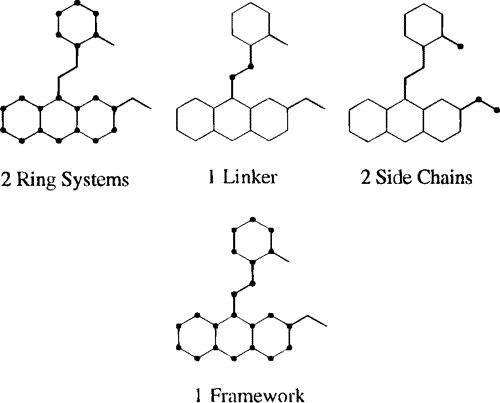

Nueva columna con los *scaffolds* de Bemis/Murcko:

In [ ]:
#Añadir nueva columna y visualizar SMILES
PandasTools.AddMurckoToFrame(df, "ROMol")
df[['canonical_smiles', 'Murcko_SMILES']]

In [ ]:
#Añadir una columna con los scaffolds en tipo Mol
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="Murcko_SMILES", molCol='scaffold')
df.head(1)

In [ ]:
#Hacer una copia del dataframe con el que estamos trabajando
df_b= df.copy()
#Eliminar columnas tipo Mol
df_b.drop("ROMol", axis=1, inplace=True)
df_b.drop("scaffold", axis=1, inplace=True)
#Conservar columnas seleccionadas
df_b = df_b[['canonical_smiles','Murcko_SMILES', 'MW','HBD','HBA','TPSA','RotBonds',
             'logP', 'CSP3','HetAtoms', 'NumRings', 'Via_admon']]

In [ ]:
#Visualizar copia del dataframe
print(f"DataFrame shape: {df_b.shape}")
df_b.head(2)

In [ ]:
#Agrupar datos por scaffold y contarlos
amount = df_b.groupby(['Murcko_SMILES']).size()
print(f"Dataset with {amount.shape[0]} different entries:",amount.sort_values(ascending=False))
#Nuevo dataframe con SMILES de scaffolds y su conteo, ordenados de mayor a menor
df_sca_all = pd.DataFrame (amount, columns = ['Amount'] )
df_sca_all=df_sca_all.sort_values(by='Amount', ascending= False)
df_sca_all=df_sca_all.reset_index(level=None, drop=False)
print ('All:', df_sca_all.shape, df_sca_all.columns)
df_sca_all

In [ ]:
#El dataframe cuenta con moléculas sin scaffold (moléculas lineales con fila vacía), anotamos en la línea la leyenda "Linear molecule":
df_sca_all.at[1, 'Murcko_SMILES']='Linear molecule'

In [ ]:
#Añadir columna de frecuencia, considerar el número total de registros para el cálculo.
df_sca_all.reset_index(drop=True, inplace=True)
df_sca_all["Frecuency"] = (df_sca_all['Amount'] / 1677)*100
print(f"Total Frecuency in Database: {sum(df_sca_all['Frecuency'])}, different entries:{sum(df_sca_all['Amount'])}, different Murcko Smiles:",
      len(df_sca_all['Murcko_SMILES']) )
df_sca_all = df_sca_all[['Murcko_SMILES', 'Amount', 'Frecuency']]
df_sca_all

In [ ]:
#Añadir columna tipo Mol al dataframe con frecuencias de scaffolds
PandasTools.AddMoleculeColumnToFrame(df_sca_all, smilesCol='Murcko_SMILES')
df_sca_all[0:1]

In [ ]:
#Visualizar scaffolds con su conteo
PandasTools.FrameToGridImage(df_sca_all[0:10], column='ROMol', legendsCol='Amount', molsPerRow=5)

#Concatenar bases de datos

Abriremos un [archivo .csv](https://github.com/DIFACQUIM/Cursos/blob/main/Datasets/DNMT1_curada.csv) que será un nuevo *dataframe* llamado "DNMT1". Este archivo contiene datos de compuestos con concentración inhibitoria 50 (IC50) reportada en ChEMBL:

In [ ]:
#Cargar el archivo:
DNMT1=pd.read_csv("https://github.com/DIFACQUIM/Cursos/raw/refs/heads/main/Datasets/DNMT1_curada.csv", delimiter=',')
#Obtener información sobre el número de filas y columnas de la base de datos
print(f"DataFrame shape: {DNMT1.shape}.")
DNMT1.head(1)

Imprimir columnas y unificar nombres:



In [ ]:
#Ver columnas
print(df.columns)
print(DNMT1.columns)

In [ ]:
#Nueva columna para especificar base de datos
df['DATASET'] = 'CHEMBL'

In [ ]:
# Seleccionar columnas
df = df[['molecule_chembl_id', 'NEW_SMILES', 'DATASET']]
DNMT1 = DNMT1[['ID', 'SMILES', 'Data set']]

# Cambiar nombre a columnas
df.columns = ["ID", "SMILES", "DATABASE_NAME"]
DNMT1.columns = ["ID", "SMILES", "DATABASE_NAME"]

# Unir (concatenar) bases de datos
DATA = pd.concat([df, DNMT1], axis=0).reset_index(drop=True)
DATA.head()

## *Quantitative Estimate of Drug-Likeness*

El QED es una medida para estimar las cualidades tipo fármaco de un compuesto. Está basado en ocho propiedades con relevancia farmacéutica: masa molar, coeficiente de partición, aceptores y donadores de puente de hidrógeno, área polar superficial, enlaces rotables, anillos aromáticos, y el número de alertas por grupos funcionales. El punto de corte que suele usarse es QED > 0.67. <br>
Referencia: https://doi.org/10.1038/nchem.1243

In [ ]:
#Añadimos la columna tipo Mol a la base de datos completa
PandasTools.AddMoleculeColumnToFrame(DATA,'SMILES','Molecule',includeFingerprints=True)
print([str(x) for x in  DATA.columns])

In [ ]:
#Visualizamos las primeras líneas del nuevo DataFrame
DATA.head(3)

In [ ]:
#Calculamos el QED
QEDlist = []

for mol in DATA['Molecule']:
    if mol is not None and isinstance(mol, Chem.Mol):
        qed_value = Chem.QED.qed(mol)
    else:
        qed_value = None
    QEDlist.append(qed_value)


DATA['QED']=QEDlist
DATA.head(3)

In [ ]:
#Graficar boxplot
ax = sns.boxplot(x="DATABASE_NAME", y="QED", data=DATA, palette="BuPu")
#Título de ejes
plt.xlabel('Base de datos', size=14)
plt.ylabel('QED', size=14)

## *Synthetic Accessibility Score*

El SAscore asigna un número entre 1 (fácil de obtener) y 10 (muy difícil de obtener) a un compuesto para estimar su accesibilidad sintética. Está basado en una combinación de contribuciones de fragmentos y una penalización por complejidad. El punto de corte suele establecerse en SAscore menor o igual a 6. <br>
Referencia: https://doi.org/10.1186/1758-2946-1-8

In [ ]:
#Importar módulos necesarios:
import os
from rdkit.Chem import RDConfig
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import sascorer

In [ ]:
#Calcular SAscore
SAlist = []

for mol in DATA['Molecule']:
    if mol is not None and isinstance(mol, Chem.Mol):
        SA = sascorer.calculateScore(mol)
    else:
        SA = None
    SAlist.append(SA)

DATA['SA']=SAlist
DATA.head(3)

In [ ]:
#Graficar boxplot
ax = sns.boxplot(x="DATABASE_NAME", y="SA", data=DATA, palette="Blues")
#Título de ejes
plt.xlabel('Base de datos', size=14)
plt.ylabel('SAscore', size=14)

In [ ]:
#Eliminar molecula tipo Mol y guardar el archivo en formato .csv
DATA.drop("Molecule", axis=1, inplace=True)
DATA.to_csv("DATA.csv", index=False)

#Para saber maś:

[*Practical chemoinformatics*](http://practicalcheminformatics.blogspot.com/)

[*Practical chemoinformatics - EDA*](http://practicalcheminformatics.blogspot.com/2021/10/exploratory-data-analysis-with.html)

[*Visualization of chemical datasets and EDA*](https://insilico-notebook.com/en/chemdata-eda/)

[*Python guides*](https://www.statology.org/python-guides/)

[Representaciones gráficas en python](http://research.iac.es/sieinvens/python-course/matplotlib.html)

[*Violinplots*](https://datagy.io/seaborn-violinplot/)



[*Progress on open chemoinformatic tools for expanding and exploring the chemical space*](https://link.springer.com/article/10.1007/s10822-021-00399-1)

[Bases de datos desde python](https://www.tutorialesprogramacionya.com/pythonya/detalleconcepto.php?punto=81&codigo=81&inicio=75) <br>
[Relaciones cuantitativas estructura-propiedad (*QSPR*)](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/05%3A_5._Quantitative_Structure_Property_Relationships/5.05%3A_Python_Assignment)